# Chosen Model:
`Regressor Chain with Random Forest Estimator`

In [2]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

#setup
import os, sys
current_path = os.path.abspath('')
parent_path = current_path
source_path = f'{parent_path}\\src'
if not source_path in sys.path: sys.path.append(source_path)

#customs
# from data_model import *
# from data_helper import *
from config import *
setup()

Config finished!


In [3]:

in_names = ['X_train', 'X_val', 'y_train', 'y_val']
X_train, X_val, y_train, y_val = [pd.read_csv(f'./data-training/{name}.csv', index_col = 'Date', parse_dates=True) for name in in_names]

In [4]:
for df in X_train, X_val, y_train, y_val:
    print(df.shape)
    display(df.head())

(1719, 16)


,LeagueDay,day_of_week,month,y_lag_1,y_lag_2,y_lag_3,y_lag_4,rolling_mean,rolling_min,rolling_max,general_rolling_mean,general_rolling_min,general_rolling_max,expanding_mean,expanding_max,expanding_min
Date,,,,,,,,,,,,,,,,
2016-09-08,1.0,3,9,0.00000,0.00000,0.00000,0.00000,0.000000,0.00000,0.00000,0.0,0.0,0.0,0.000000,0.00000,0.00000
2016-09-09,2.0,4,9,64.00417,0.00000,0.00000,0.00000,0.000000,0.00000,0.00000,0.0,0.0,0.0,64.259340,64.51451,64.00417
2016-09-10,3.0,5,9,64.51451,64.00417,0.00000,0.00000,64.913446,64.00417,65.98811,0.0,0.0,0.0,64.507160,65.00280,64.00417
2016-09-11,4.0,6,9,65.00280,64.51451,64.00417,0.00000,65.316060,64.51451,66.01724,0.0,0.0,0.0,64.644780,65.05764,64.00417
2016-09-12,5.0,0,9,65.05764,65.00280,64.51451,64.00417,66.230082,65.00280,69.08462,0.0,0.0,0.0,64.913446,65.98811,64.00417


(88, 16)


,LeagueDay,day_of_week,month,y_lag_1,y_lag_2,y_lag_3,y_lag_4,rolling_mean,rolling_min,rolling_max,general_rolling_mean,general_rolling_min,general_rolling_max,expanding_mean,expanding_max,expanding_min
Date,,,,,,,,,,,,,,,,
2021-07-23,1.0,4,7,104.50518,105.00000,105.66650,105.89479,78.817024,50.00000,105.00000,87.189063,50.0,106.27503,111.783670,205.0,18.01531
2021-07-24,2.0,5,7,50.00000,104.50518,105.00000,105.66650,73.217024,50.00000,104.50518,86.312877,50.0,106.00000,111.754743,205.0,18.01531
2021-07-25,3.0,6,7,62.00000,50.00000,104.50518,105.00000,67.498888,50.00000,77.00000,85.446210,50.0,106.00000,111.731994,205.0,18.01531
2021-07-26,4.0,0,7,72.57994,62.00000,50.00000,104.50518,72.498888,62.00000,77.00000,84.646210,50.0,105.89479,111.711836,205.0,18.01531
2021-07-27,5.0,1,7,77.00000,72.57994,62.00000,50.00000,75.298888,72.57994,77.00000,83.873119,50.0,105.66650,111.691072,205.0,18.01531


(1719, 5)


,y_step_1,y_step_2,y_step_3,y_step_4,y_step_5
Date,,,,,
2016-09-08,64.51451,65.00280,65.05764,65.98811,66.01724
2016-09-09,65.00280,65.05764,65.98811,66.01724,69.08462
2016-09-10,65.05764,65.98811,66.01724,69.08462,69.83986
2016-09-11,65.98811,66.01724,69.08462,69.83986,68.44797
2016-09-12,66.01724,69.08462,69.83986,68.44797,66.80162


(88, 5)


,y_step_1,y_step_2,y_step_3,y_step_4,y_step_5
Date,,,,,
2021-07-23,62.00000,72.57994,77.0000,75.91450,75.00000
2021-07-24,72.57994,77.00000,75.9145,75.00000,76.00000
2021-07-25,77.00000,75.91450,75.0000,76.00000,80.00000
2021-07-26,75.91450,75.00000,76.0000,80.00000,93.13224
2021-07-27,75.00000,76.00000,80.0000,93.13224,93.00000


# Model

### Metrics

In [5]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
def evaluate(model, X_val, y_val):
    pred = model.predict(X_val)
    mse = mean_squared_error(pred, y_val)
    mape = mean_absolute_percentage_error(pred, y_val)
    print('Result - MSE: ', mse, ' - MAPE: ', mape)

### Plotting

In [11]:
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False,
)

def plot_multistep(y, every=1, ax=None, palette_kwargs=None):
    palette_kwargs_ = dict(palette='husl', n_colors=16, desat=None)
    if palette_kwargs is not None:
        palette_kwargs_.update(palette_kwargs)
    palette = sns.color_palette(**palette_kwargs_)
    if ax is None:
        fig, ax = plt.subplots()
    ax.set_prop_cycle(plt.cycler('color', palette))
    for date, preds in y[::every].iterrows():
        preds.index = pd.period_range(start=date, periods=len(preds))
        preds.plot(ax=ax)
    return ax

def plot_stepped_predictions(model, X_val, y_val, prediction_step = 3):
    pred = pd.DataFrame(
        model.predict(X_val),
        index = y_val.index, columns = y_val.columns
    )
    palette = dict(palette='husl', n_colors=64)
    ax2 = y_val['y_step_1'].plot(**plot_params)
    ax2 = plot_multistep(pred, ax=ax2, palette_kwargs=palette, every=prediction_step)
    _ = ax2.legend(['Value', 'Forecast'])

    plt.show()

### Training

Result - MSE:  33.23404017042217  - MAPE:  0.02468643024875114
Result - MSE:  168.94633445500375  - MAPE:  0.07646021614815901


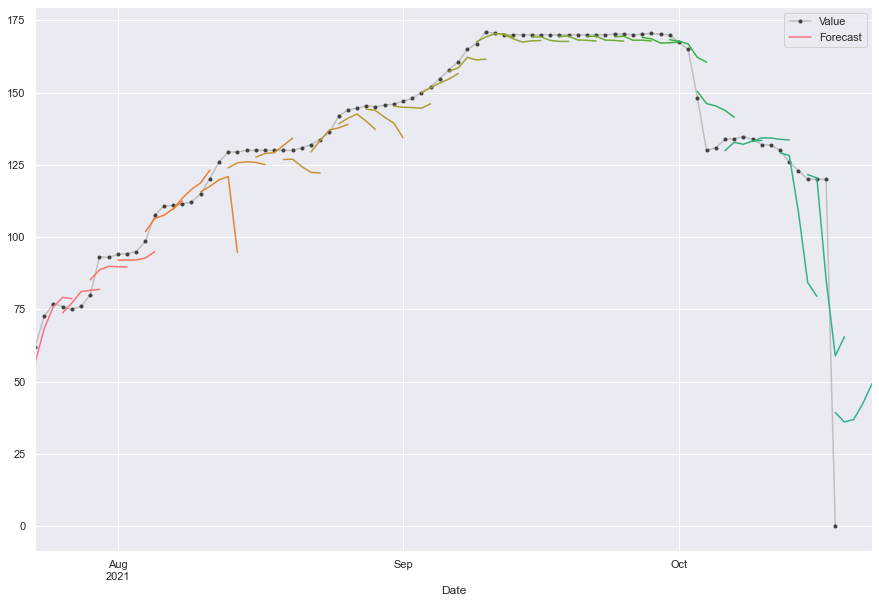

In [12]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import RegressorChain

model = RegressorChain(base_estimator= RandomForestRegressor())

model.fit(X_train, y_train)

evaluate(model, X_train, y_train)
evaluate(model, X_val, y_val)

plot_stepped_predictions(model, X_val, y_val)

### Feature Importance

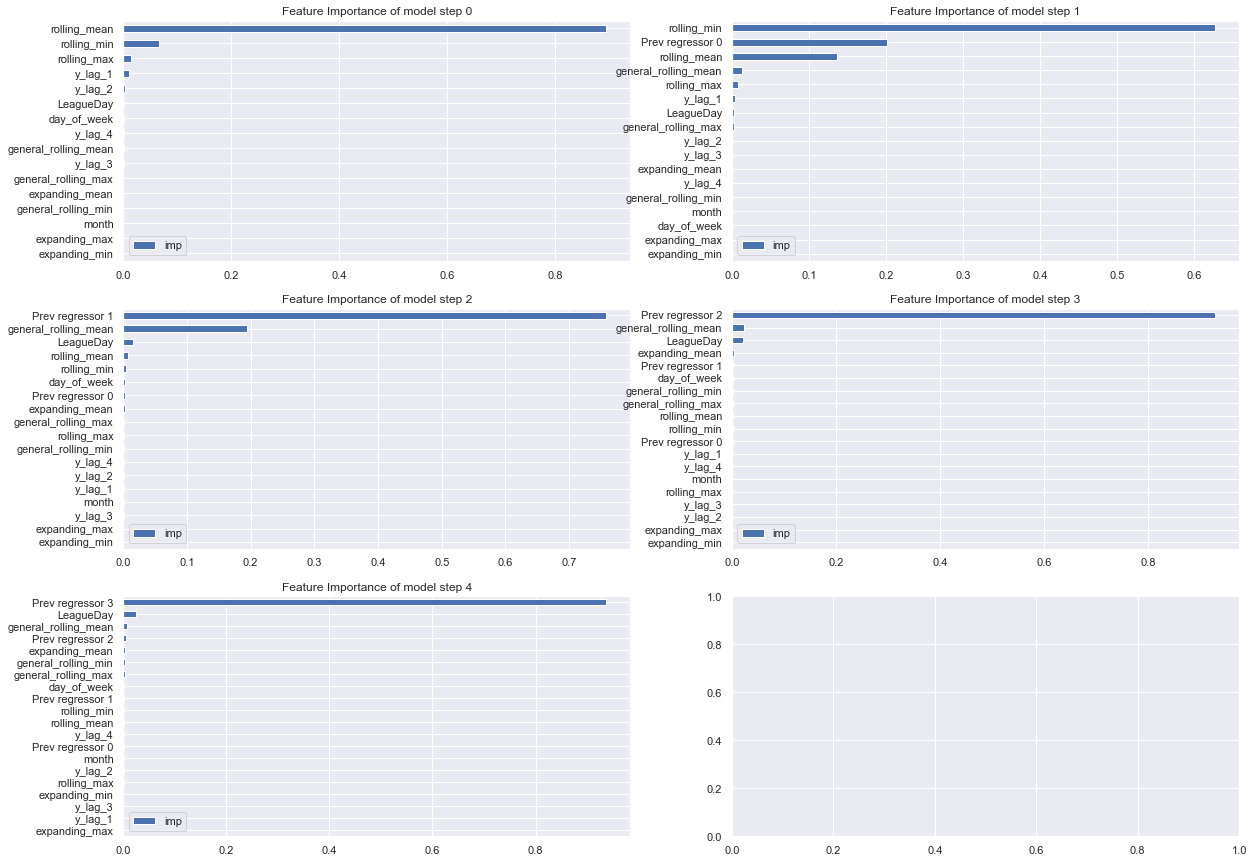

In [14]:
from math import ceil
cols = 2
rows = ceil(len(model.estimators_) / float(cols))
fig, axes = plt.subplots(rows, cols, figsize = (20,15))

for idx, estimator in enumerate(model.estimators_):
    original_feature_names = list(model.feature_names_in_)
    prev_regressor_names = [f'Prev regressor {i}' for i in range(idx)]
    feature_names = original_feature_names + prev_regressor_names

    ax = axes.flat[idx]
    ax.title.set_text(f'Feature Importance of model step {idx}')

    # get importance
    importance = estimator.feature_importances_

    df = pd.DataFrame(
        importance,
        index = feature_names, columns = ['imp']
    ).abs().sort_values(by='imp')
    # plot feature importance
    df.plot.barh(ax=ax)
    # ax.barh(feature_names, importance)
plt.show()